# 회귀(Regrassion) 란?


둘 사이의 상관관계를 모델링하는 기법( Y = w₁X₁ + w₂X₂ + ...  )
- 여러개의 독립변수(= Fiture. 아파트 평수, 주변 학군, 동네 등)
- 한 개의 종속변수(= 결정값. 아파트 가격)
- w(weight) = 회귀계수(Coefficient) 또는 가중치(Weight)
- Fiture와 결정값 학습을 통해 최적의 회귀계수를 찾는 것.
    ### 독립변수 개수
        # 1개 : 단일회귀
        # 多  : 다중회귀
    ### 회귀계수 결합
        # 선형회귀 (가장 많이 사용. 규제 방법에 따라 유형 나뉨)
        # 비선형회귀

# 선형회귀
- 릿지(Ridge) : L2규제(상대적으로 큰 회귀계수값을 낮춤)
- 라쏘(Lasso) : L1규제(영향력이 적은 Fiture의 회귀계수 0으로 규제)
- 엘라스틱넷(ElasticNet) : L1 + L2
- 로지스틱(Logistic) : 사실상 분류에 사용되는 모델.

# 단순 선형회귀
독립변수 1개. 종속변수 1개.

잔차 = 실제값과 모델값 사이의 오류.


최적의 모델 = 잔차의 합이 최소가 되는 모델.
- 잔차는 양수 또는 음수 모두 가능해서 합이 0이 될 수 있음.
- 이 문제를 해결하기 위해 두 가지 방법 사용.
    - 절대값을 취해서 사용(MAE : Mean Absolute Error).
    - 제곱을 구해서 사용(RSS : Residual Sum of Square).
- 일반적으로 미분 등의 계산 편리성을 위해 RSS 사용.
- RSS를 비용(Cost)라고 하며, 회귀계수를 사용한 RSS를 비용함수라고 한다.

# 경사하강법(Gradient Descent)

점진적으로 반복적인 계산을 통해 W 파라미터 업데이트. 최소값 도출.

- 오차는 어느 부분에서는 증가하다가 어느 부분에서는 감소할 것.
- 이를 그래프하면 2차원 포물선 그래프.
- 미분을 통해서 최소값 도출 가능.
    - 일반적인 미분이 아닌 편미분 사용.
    - 편미분 값이 너무 클 때를 대비하여 보정계수 a(Alpha)를 적용.

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


def get_weight_updates(w1, w0, X, Y, learning_rate=0.01):
    N = len(Y)
    
    # w1, w0과 동일한 shape과 크기를 가진 0행렬로 초기화.
    w1_update=np.zeros_like(w1)
    w0_update=np.zeros_like(w0)
    
    # 예측배열 및 차이값 계산
    Y_pred = np.dot(X, w1.T) + w0
    diff = Y - Y_pred
    
    # 내적 연산을 위해 모두 1을 가진 행렬 생성.
    w0_factors = np.ones((N, 1))
    
    # w1_update와 w0_update 계산
    w1_update = -(2/N)*learning_rate*(np.dot(X.T, diff))
    w0_update = -(2/N)*learning_rate*np.dot(w0_factors.T, diff)
    
    return w1_update, w0_update


def gradient_descent_steps(X, Y, iters=10000):
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))
    for ind in range(iters):
        w1_update, w0_update = get_weight_updates(w1, w0, X, Y, learning_rate = 0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update
    return w1, w0


def get_cost(Y, Y_pred):
    N = len(Y)
    Cost = np.sum(np.square(Y - Y_pred))/N
    return Cost

### 예제

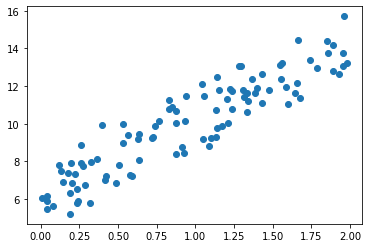

In [13]:
# 난수 생성
np.random.seed(0)

# 예제 : Y = 4X + 6
X = 2 * np.random.rand(100, 1)
Y = 6 + 4 * X + np.random.randn(100, 1)

plt.scatter(X, Y)

w1:4.022 w0:6.162
Gradient Descent Total Cost : 0.9935


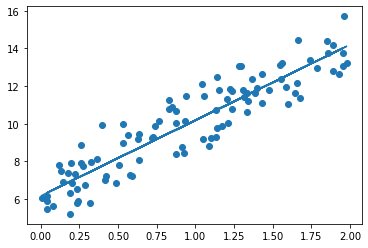

In [10]:
w1, w0 = gradient_descent_steps(X, Y, iters = 1000)
print('w1:{0:.3f} w0:{1:.3f}'.format(w1[0,0], w0[0,0]))
Y_pred = w1[0,0] * X + w0
print('Gradient Descent Total Cost : {0:.4f}'.format(get_cost(Y, Y_pred)))

plt.scatter(X, Y)
plt.plot(X, Y_pred)
plt.show()

# 확률적 경사하강법

일반적으로 경사하강법은 모든 학습데이터에 대해 비용함수를 반복적으로 계산(업데이트).

오래 걸린다는 단점 때문에 ' 확률적 경사하강법 ' 사용.

- 전체 weight가 아닌 일부 weight에 대해 비용함수 계산.
- batch_size 만큼 데이터 추출하여 이를 기반으로 weight 업데이트.
- 이를 제외한 나머지는 경사하강법과 방식과 동일.

In [14]:
def stochastic_gradient_descent_steps(X, Y, batch_size=10, iters=1000):
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))
    prev_cost = 100000
    iter_index = 0

    for ind in range(iters):
        np.random.seed(ind)

        # 전체 데이터에서 랜덤하게 batch_size만큼 데이터 추출하여 저장.
        stochastic_random_index = np.random.permutation(X.shape[0])
        sample_X = X[stochastic_random_index[0:batch_size]]
        sample_Y = Y[stochastic_random_index[0:batch_size]]

        # 해당 데이터를 기반으로 update 계산 후 값 갱신.
        w1_update, w0_update = get_weight_updates(w1, w0, sample_X, sample_Y, learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update

    return w1 ,w0

In [15]:
w1, w0 = stochastic_gradient_descent_steps(X, Y, iters=1000)
print('w1: ', round(w1[0,0], 3), ', w0: ', round(w0[0,0], 3))
Y_pred = w1[0,0] * X + w0
print('Stochastic Gradient Descent Total Cost : {0:.4f}'.format(get_cost(Y, Y_pred)))


w1:  4.028 , w0:  6.156
Stochastic Gradient Descent Total Cost : 0.9937


확률적 경사하강법으로 구한 Cost는 0.9937로 경사하강법의 0.9935와 큰 차이가 없다.

따라서 큰 데이터를 처리할 경우에는 확률적 경사하강법을 사용.



# 교재예제 ( 보스턴 주택 가격 예측 )

In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.datasets import load_boston


# Boston Data load
boston = load_boston()


# Change DataFrame
bostonDF = pd.DataFrame(boston.data, columns = boston.feature_names)

In [17]:
# Change 'target' array to 'Price'
bostonDF['Price'] = boston.target
print('Shape : ', bostonDF.shape)
bostonDF.head()

Shape :  (506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [22]:
bostonDF.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [21]:
bostonDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


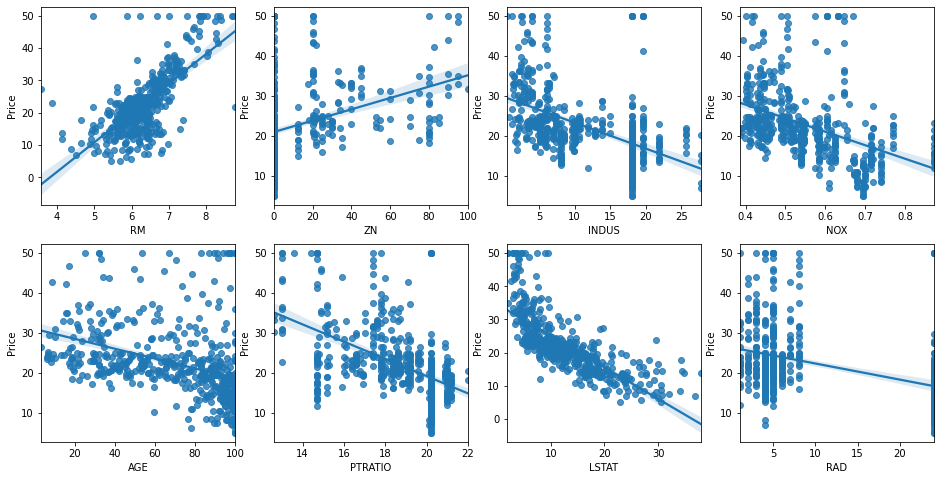

In [25]:
# 각 Column 과 Price Column간의 상관관계 분석.
# Matplotlib.subplots() 을 사용하여 다중 그래프 출력.

fig, axs = plt.subplots(figsize=(16,8), ncols=4, nrows=2)
lm_features = ['RM', 'ZN', 'INDUS', 'NOX', 'AGE', 'PTRATIO', 'LSTAT', 'RAD']
for i, feature in enumerate(lm_features):
    row = int(i/4)
    col = i%4
    
    # seaborn의 regplot 이용하여 산점도 및 선형회귀 직선 표현
    sns.regplot(x=feature, y='Price', data=bostonDF, ax=axs[row][col])

In [36]:
# plot 결과 RM(방 개수), LSTAT(하위 계층 비율) 이 Price와 영향도가 크게 나타남.
# RM은 Positive Linearity
# LSTAT는 Negative Linearity


# 이를 이용하여 회귀모델 제작
# LinearRegression Class train_test_split() 을 사용하여 학습 및 테스트 데이터 분리.

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


Y_target = bostonDF['Price']
X_data = bostonDF.drop(['Price'], axis=1, inplace=False)
X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_target, test_size=0.3, random_state=156)


# 선형 회귀 OLS로 학습/예측/평가 수행.
lr = LinearRegression()
lr.fit(X_train, Y_train)

Y_pred = lr.predict(X_test)
MSE = mean_squared_error(Y_test, Y_pred)
RMSE = np.sqrt(MSE)

print('MSE : {0:.3f}, RMSE : {1:.3F}'.format(MSE, RMSE))
print('Variance score : {0:.3f}'.format(r2_score(Y_test, Y_pred)))
print('\n절편 값 : ', lr.intercept_)
print('회귀 계수 값 : ', np.round(lr.coef_, 1))

MSE : 17.297, RMSE : 4.159
Variance score : 0.757

절편 값 :  40.9955951721646
회귀 계수 값 :  [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


In [37]:
# 회귀 계수를 정렬하기 위해 Series로 생성.
coeff = pd.Series(np.round(lr.coef_, 1), index=X_data.columns)
coeff.sort_values(ascending=False)

RM          3.4
CHAS        3.0
RAD         0.4
ZN          0.1
B           0.0
TAX        -0.0
AGE         0.0
INDUS       0.0
CRIM       -0.1
LSTAT      -0.6
PTRATIO    -0.9
DIS        -1.7
NOX       -19.8
dtype: float64

위 결과를 토대로 RM 과 NOX의 회귀값이 가장 크다는 것을 알 수 있다.

# 교차검증

train Data 와 Test Data로 한 번 나누는 것 보다 훨씬 안정적이고 뛰어난 평가 방법.

하나의 데이터를 여러 번 반복해서 나눈 뒤 반복해서 학습한다.

가장 널리 사용되는 교차검증법은 'K-Fold 교차검증' 방법이다.

앞의 K는 특정 숫자를 의미하며, 보통 5 또는 10을 사용한다.

5-Fold 교차검증의 경우

데이터를 5등분한 뒤, 등분 하나를 Test Data로, 나머지를 Train Data로 사용한다.

- sklearn 의 model_selection 모듈에서 cross_val_score 함수로 구현되어있다.
- 매개변수는 '평가모델', '훈련데이터', '타깃레이블' 을 필요로 한다.
- RMSE를 제공하지 않는다. MSE로 직접 계산해야 한다.

사이킷런의 metric 평가 기준은 metric 값이 높을수록 좋은 모델로 판단한다.

하지만 일반적인 회귀는 MSE 값이 낮을수록 좋은 회귀 모델로 판단한다.

이 둘의 차이를 동일시하기 위해 MSE 값에 -1을 곱하여 사용한다.

굳이 -1을 곱할 필요 없이, scoring='neg_mean_squared_error' 를 사용하면 음수값을 자동 반환한다.

단, RMSE를 구할 땐 -1을 다시 곱해서 원래의 MSE 값을 사용해야한다.

In [69]:
from sklearn.model_selection import cross_val_score

Y_target = bostonDF['Price']
X_data = bostonDF.drop(['Price'], axis = 1, inplace=False)
lr = LinearRegression()


# cross_val_score()로 5폴드세트 사용하여 MSE 계산한 뒤 RMSE 재계산
negMSE = cross_val_score(lr, X_data, Y_target, scoring='neg_mean_squared_error', cv=5)
RMSE = np.sqrt(-1*negMSE)
avgRMSE = np.mean(RMSE)


# cross_val_score(scoring = 'neg_mean_squared_error') 로 반환된 값은 모두 음수임을 참고.
print('5 Folds Negative MSE score: ', np.round(negMSE, 2))
print('5 Folds RMSE score: ', np.round(RMSE))
print('5 Folds avgerage RMSE score: {0:.3f}'.format(avgRMSE))

5 Folds Negative MSE score:  [-12.46 -26.05 -33.07 -80.76 -33.31]
5 Folds RMSE score:  [4. 5. 6. 9. 6.]
5 Folds avgerage RMSE score: 5.829


# Kaggle Example (Boston)

In [43]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.datasets import load_boston
boston = load_boston()

data = pd.DataFrame(boston.data)
data.columns = boston.feature_names
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [45]:
# 종속변수 선언
data['Price'] = boston.target
data.shape

(506, 14)

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [48]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


(14, 14)


<AxesSubplot:>

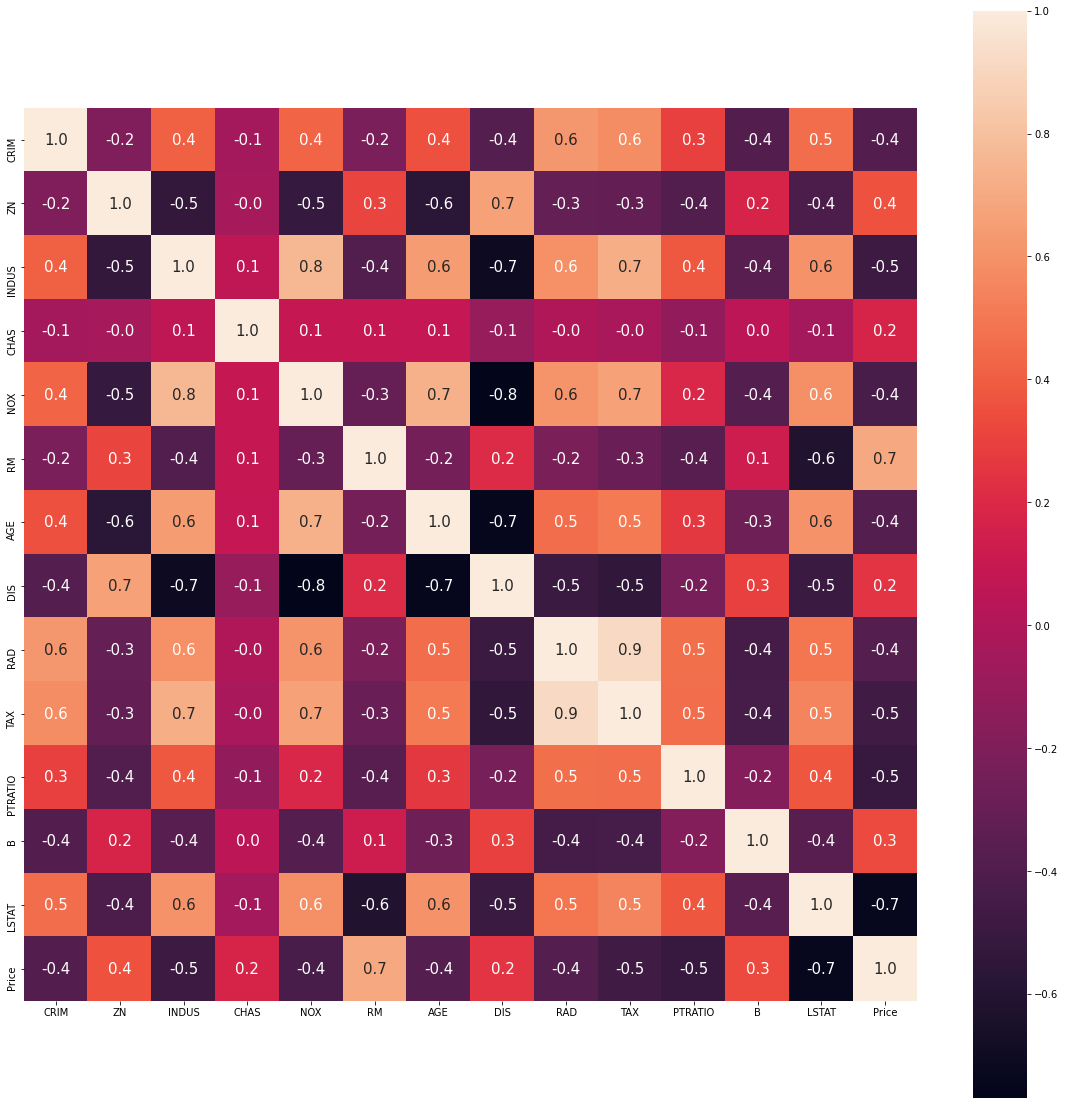

In [51]:
# 상관관계 분석
corr = data.corr()
print(corr.shape)

plt.figure(figsize = (20,20))
sns.heatmap(corr, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':15})

In [52]:
# 종속변수 및 독립변수 분할
X = data.drop(['Price'], axis=1)
Y = data['Price']


# 학습 데이터 및 테스트 데이터 분할
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 4)

## Linear Regression

In [56]:
from sklearn.linear_model import LinearRegression

# Create a LinearRegression Model
lm = LinearRegression()

# Train the model using the training data
lm.fit(X_train, Y_train)

LinearRegression()

In [58]:
# Value of Y intercept
print('절편(intercept) : ', lm.intercept_)

# Converting the coefficient Values to Series
coefficient = pd.Series(lm.coef_, index=X_data.columns)
coefficient

절편(intercept) :  36.35704137659466


CRIM       -0.122570
ZN          0.055678
INDUS      -0.008834
CHAS        4.693448
NOX       -14.435783
RM          3.280080
AGE        -0.003448
DIS        -1.552144
RAD         0.326250
TAX        -0.014067
PTRATIO    -0.803275
B           0.009354
LSTAT      -0.523478
dtype: float64

In [62]:
# Model prediction on train Data
Y_pred = lm.predict(X_train)

# Model Evaluatoin
print('R² : ', metrics.r2_score(Y_train, Y_pred))
print('MAE : ', metrics.mean_absolute_error(Y_train, Y_pred))
print('MSE : ', metrics.mean_squared_error(Y_train, Y_pred))
print('RMSE : ', np.sqrt(metrics.mean_squared_error(Y_train, Y_pred)))

R² :  0.7465991966746854
MAE :  3.08986109497113
MSE :  19.07368870346903
RMSE :  4.367343437774162


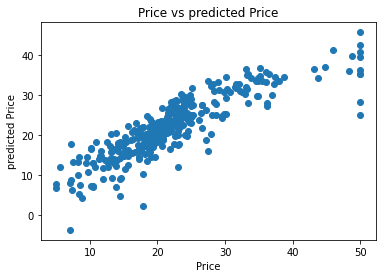

In [63]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(Y_train, Y_pred)
plt.xlabel('Price')
plt.ylabel('predicted Price')
plt.title('Price vs predicted Price')
plt.show()

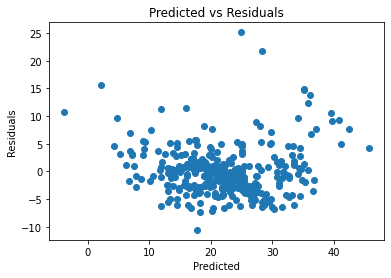

c:\aip\python_workspace\venv\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


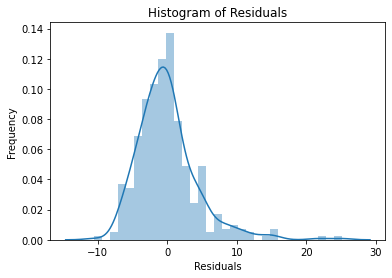

In [67]:
# Checking residuals
plt.scatter(Y_pred, Y_train-Y_pred)
plt.title("Predicted vs Residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()


# Checking Normality of errors
sns.distplot(Y_train-Y_pred)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

In [68]:
# 잔차(Residuals) 가 0에 균등하게 분포하고 있으므로
# 선형 가정 모델은 매우 적합하다고 할 수 있다.
# 따라서 해당 모델을 사용하여 Test Data를 예측할 수 있다.


# Predict Test Data
Y_test_pred = lm.predict(X_test)


# Model Evaluatoin
print('R² : ', metrics.r2_score(Y_test, Y_test_pred))
print('MAE : ', metrics.mean_absolute_error(Y_test, Y_test_pred))
print('MSE : ', metrics.mean_squared_error(Y_test, Y_test_pred))
print('RMSE : ', np.sqrt(metrics.mean_squared_error(Y_test, Y_test_pred)))

R² :  0.7121818377409181
MAE :  3.859005592370746
MSE :  30.053993307124284
RMSE :  5.482152251362988


Test 데이터로 예측한 결과, Train 데이터로 예측했을 때와 값의 변동이 거의 없다.

따라서 해당 모델은 과적합 모델이 아니다.

# Random Forest 및 XGBoost Regression 생략.


예제 Kaggle URL = 
https://www.kaggle.com/shreayan98c/boston-house-price-prediction